In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, cheb2poly
import sys
sys.path.insert(0, '../seal_wrapper/')
from seal_wrapper import EA

In [26]:
x = np.linspace(-3.9, 4.0, 80)
x

array([-3.9000000e+00, -3.8000000e+00, -3.7000000e+00, -3.6000000e+00,
       -3.5000000e+00, -3.4000000e+00, -3.3000000e+00, -3.2000000e+00,
       -3.1000000e+00, -3.0000000e+00, -2.9000000e+00, -2.8000000e+00,
       -2.7000000e+00, -2.6000000e+00, -2.5000000e+00, -2.4000000e+00,
       -2.3000000e+00, -2.2000000e+00, -2.1000000e+00, -2.0000000e+00,
       -1.9000000e+00, -1.8000000e+00, -1.7000000e+00, -1.6000000e+00,
       -1.5000000e+00, -1.4000000e+00, -1.3000000e+00, -1.2000000e+00,
       -1.1000000e+00, -1.0000000e+00, -9.0000000e-01, -8.0000000e-01,
       -7.0000000e-01, -6.0000000e-01, -5.0000000e-01, -4.0000000e-01,
       -3.0000000e-01, -2.0000000e-01, -1.0000000e-01,  4.4408921e-16,
        1.0000000e-01,  2.0000000e-01,  3.0000000e-01,  4.0000000e-01,
        5.0000000e-01,  6.0000000e-01,  7.0000000e-01,  8.0000000e-01,
        9.0000000e-01,  1.0000000e+00,  1.1000000e+00,  1.2000000e+00,
        1.3000000e+00,  1.4000000e+00,  1.5000000e+00,  1.6000000e+00,
      

In [27]:
def relu(z):
    return np.maximum(0, z)

In [28]:
y = relu(x)

In [29]:
coeffs_cheb = chebfit(x, y, deg=4)

In [30]:
coeffs = cheb2poly(coeffs_cheb)
coeffs

array([ 2.34008531e-01,  4.97068785e-01,  2.05206454e-01,  4.27914616e-04,
       -6.41871924e-03])

In [31]:
data = x[:, None] ** np.arange(coeffs.shape[0])

In [32]:
relu_approx = data.dot(coeffs[:, None])

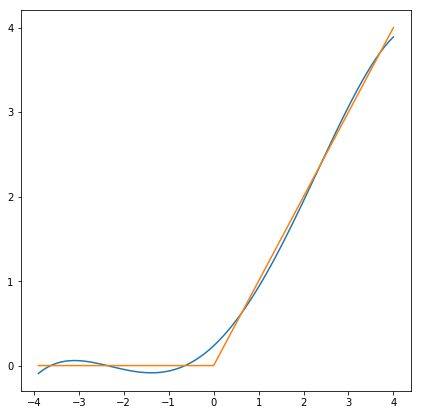

In [33]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)

In [11]:
x_enc = EA(x[:, None], True)

In [12]:
x_relu = x_enc.relu()

In [13]:
relu_vals = x_relu.values()

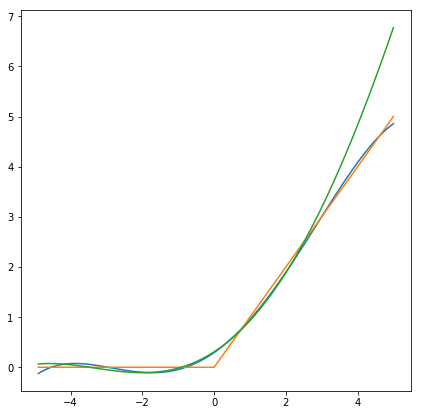

In [14]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)
plt.plot(x, relu_vals)